In [5]:
# In this analysis we will explores various factors from a dataset containing global data fro the year 2023.
# The goal is to gain insights into relationships between birth rates, fertitlity rates, infant mortality.
# Life expectancy, physician availability and population accross different country

In [6]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('world-data-2023.csv')

In [8]:
data.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [9]:
data.shape

(195, 35)

# Data Cleaning and Preparation

In [10]:
# Since there are 35 columns, I will reduce the size of this data set and clean the subset based on feature i want to explore
data.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [11]:
data = data[['Country', 'Birth Rate', 'Fertility Rate', 'Infant mortality','Life expectancy','Physicians per thousand','Population']]

In [12]:
data.head()

,Country,Birth Rate,Fertility Rate,Infant mortality,Life expectancy,Physicians per thousand,Population
0,Afghanistan,32.49,4.47,47.9,64.5,0.28,"38,041,754"
1,Albania,11.78,1.62,7.8,78.5,1.20,"2,854,191"
2,Algeria,24.28,3.02,20.1,76.7,1.72,"43,053,054"
3,Andorra,7.20,1.27,2.7,NaN,3.33,"77,142"
4,Angola,40.73,5.52,51.6,60.8,0.21,"31,825,295"


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  195 non-null    object 
 1   Birth Rate               189 non-null    float64
 2   Fertility Rate           188 non-null    float64
 3   Infant mortality         189 non-null    float64
 4   Life expectancy          187 non-null    float64
 5   Physicians per thousand  188 non-null    float64
 6   Population               194 non-null    object 
dtypes: float64(5), object(2)
memory usage: 10.8+ KB


# The following columns have missing values:
- Birth Rate
-Fertility Rate
-Infant mortality
-Physicians per thousand
-Population(currently of object tyoe due to the presence of commas in the numbers)

In [14]:
 # Convert 'Population' to strings before replacing commas
 data['Population'] = data['Population'].astype(str).str.replace(',','')

 # Convert 'Population' to numeric with 'coerce' option
 # The coerce option means that anything that cannot be converted to a numeric data type will be made null value
 data['Population'] = pd.to_numeric(data['Population'], errors= 'coerce')

<ipython-input-14-e4a38be85598>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Population'] = data['Population'].astype(str).str.replace(',','')
<ipython-input-14-e4a38be85598>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Population'] = pd.to_numeric(data['Population'], errors= 'coerce')


In [15]:
 # Columns to impute
 columns_to_impute = ['Birth Rate', 'Fertility Rate', 'Infant mortality', 'Life expectancy', 'Physicians per thousand', 'Population']

 # Impute missing values with columns medians
 median_values = data[columns_to_impute].median(numeric_only= True)
 data[columns_to_impute] = data[columns_to_impute].fillna(median_values)

In [17]:
# Rename columns for consistency
data.rename(columns = {'Birth Rate' : 'Birth_Rate'}, inplace = True)
data.rename(columns = {'Fertility Rate' : 'Fertility_Rate'}, inplace = True)
data.rename(columns = {'Infant mortality ' : 'Infant_Mortality'}, inplace = True)
data.rename(columns = {'Life expectancy' : 'Life_Expectancy'}, inplace = True)
data.rename(columns = {'Physicians per thousand' : 'Physicians_Per_Thousand'}, inplace = True)

data.columns

Index(['Country', 'Birth_Rate', 'Fertility_Rate', 'Infant mortality',
       'Life_Expectancy', 'Physicians_Per_Thousand', 'Population'],
      dtype='object')

# Visualisation

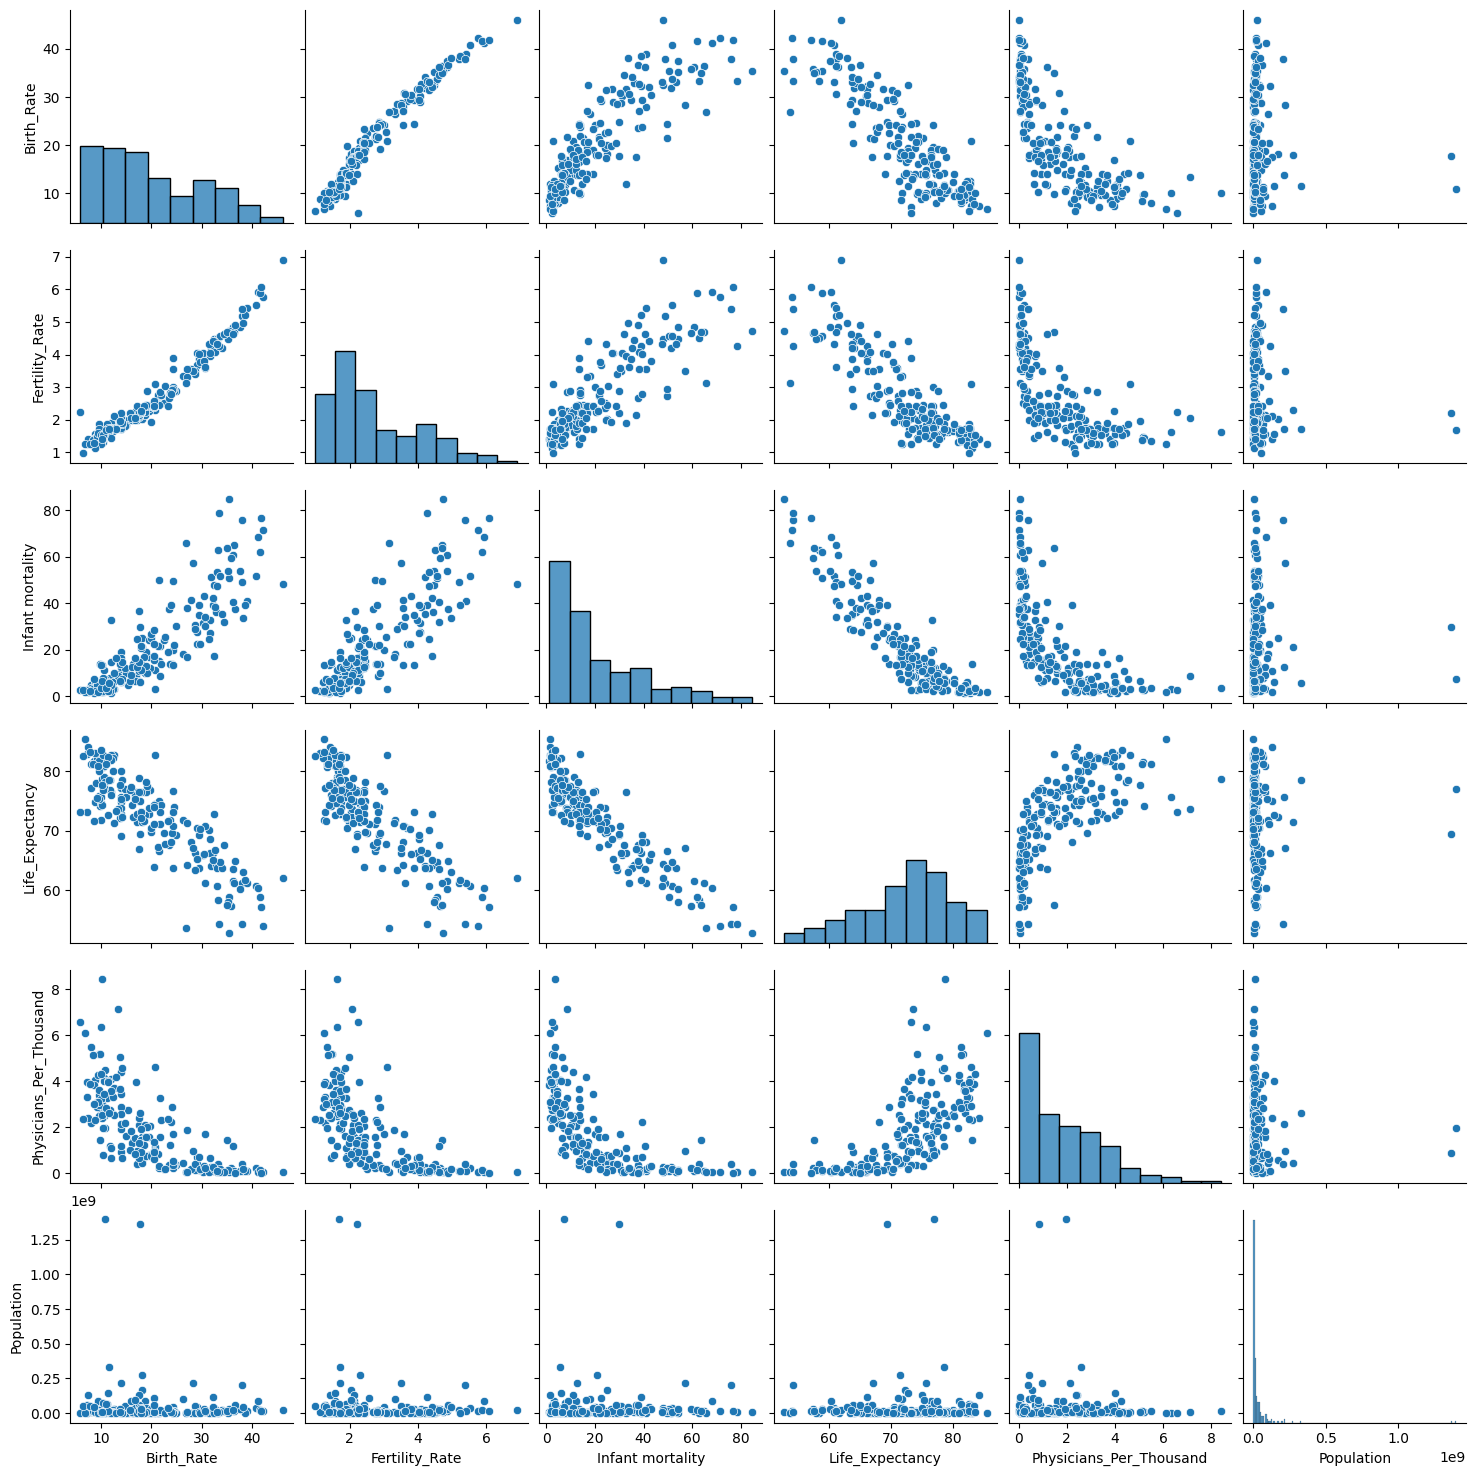

In [25]:
# Display pair plots to explore correlations across the data
sns.pairplot(data)
plt.show()

This demonstrates some interesting and strong correlations between features of the dataset.

<ipython-input-23-b3934c92b25b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = data.corr()


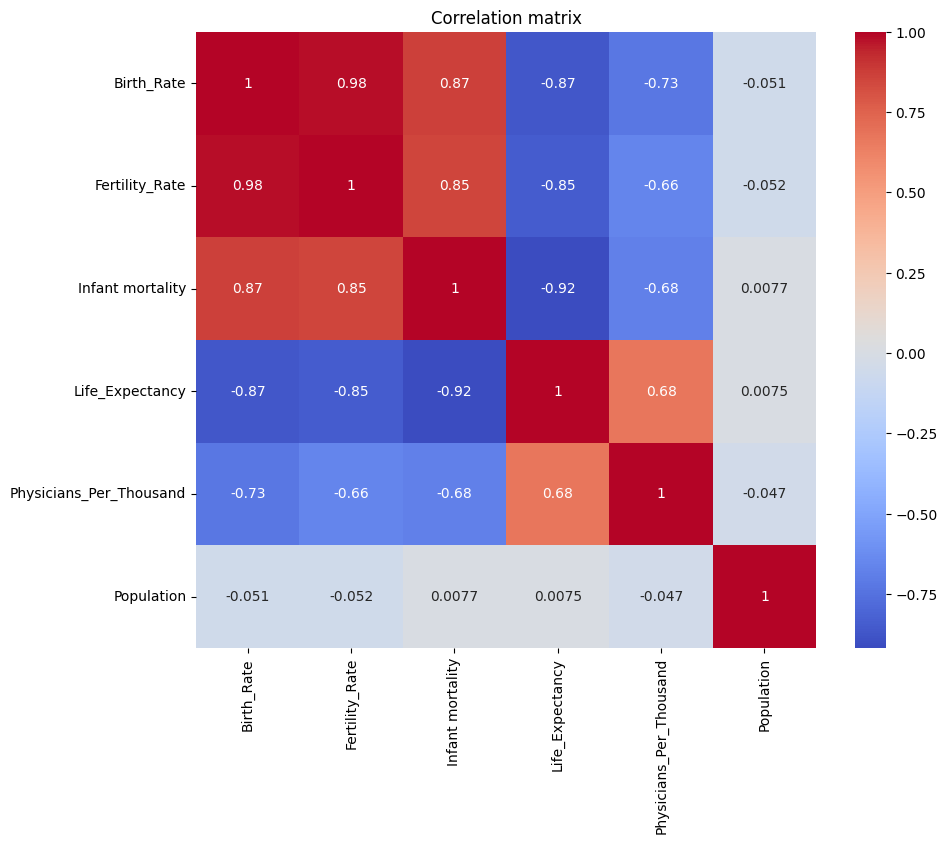

In [23]:
# Let's explore some of this further by calculating and displaying the correlation matrix heatmap

cm = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot = True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

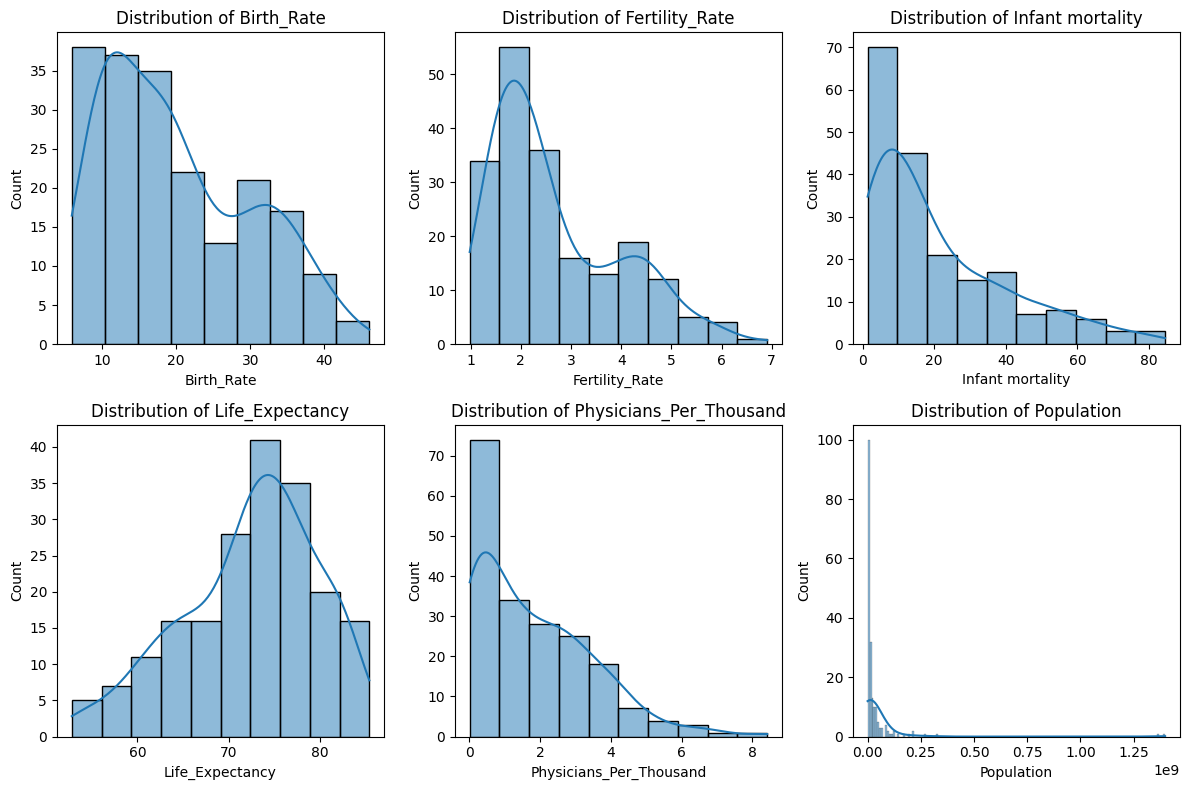

In [30]:
# Display distribution histogram for each column
plt.figure(figsize=(12,8))

for column in data.columns[1:]:
  plt.subplot(2,3, data.columns.get_loc(column))
  sns.histplot(data[column], kde = True)
  plt.title(f'Distribution of {column}')

plt.tight_layout()

<Axes: xlabel='Birth_Rate', ylabel='Life_Expectancy'>

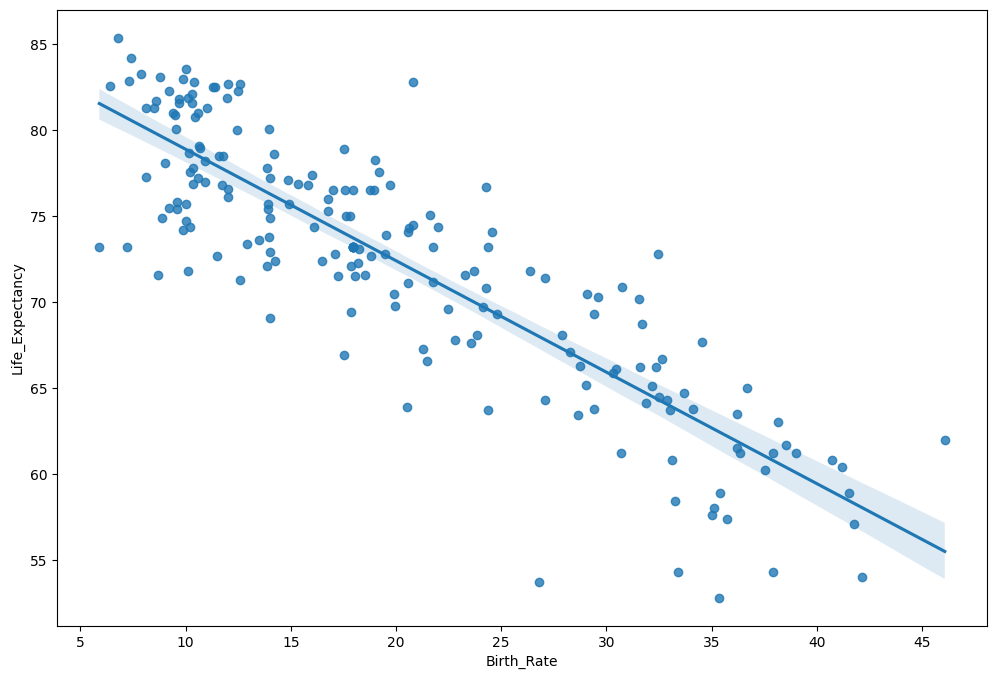

In [31]:
# Display Scatter plot of Birth Rate vs Life Expectancy
plt.figure(figsize=(12,8))
sns.regplot(data = data, x= 'Birth_Rate', y= 'Life_Expectancy')

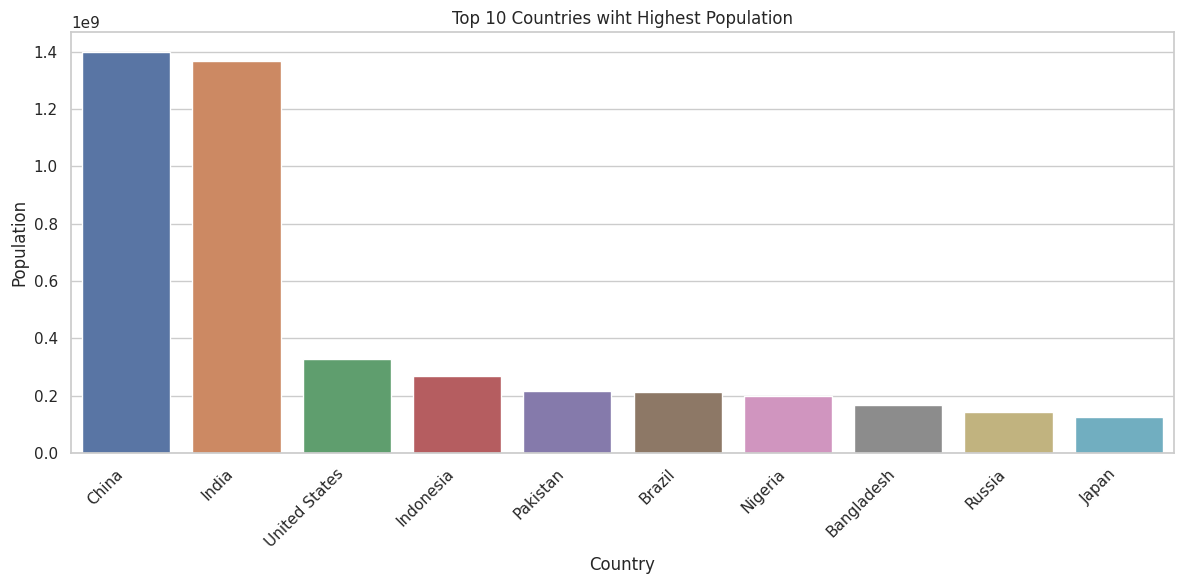

In [40]:
# Display top 10 countries with highest population
top_10_populaton = data.nlargest(10,'Population')

# Set up the style and context for the plot
sns.set(style ='whitegrid')
plt.figure(figsize=(12,6))

# Create a bar plot
ax = sns.barplot(x = 'Country', y = 'Population', data = top_10_populaton)
ax.set_title(f'Top {10} Countries wiht Highest Population')
ax.set_xlabel('Country')
ax.set_ylabel('Population')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

## Grouping and Aggregation

In [42]:
# Calculate and display average fertility rates by country
Avg_fertility = data.groupby('Country')['Fertility_Rate'].mean()

print('Average Fertility Rate by Country:')
print(Avg_fertility)

Average Fertility Rate by Country:
Country
Afghanistan    4.47
Albania        1.62
Algeria        3.02
Andorra        1.27
Angola         5.52
               ... 
Venezuela      2.27
Vietnam        2.05
Yemen          3.79
Zambia         4.63
Zimbabwe       3.62
Name: Fertility_Rate, Length: 195, dtype: float64


In [44]:
# Calculate and display countries with the highest life expectancy
High_expectancy = data.groupby('Country')['Life_Expectancy'].max().nlargest(10)
print(High_expectancy)

Country
San Marino       85.4
Japan            84.2
Switzerland      83.6
Spain            83.3
Singapore        83.1
Liechtenstein    83.0
Italy            82.9
Israel           82.8
Norway           82.8
Australia        82.7
Name: Life_Expectancy, dtype: float64


In [46]:
# Calculate and display countries with the lowest life expectancy
Lowest = data.groupby('Country')['Life_Expectancy'].min().nsmallest(10)
print(Lowest)

Country
Central African Republic    52.8
Lesotho                     53.7
Chad                        54.0
Nigeria                     54.3
Sierra Leone                54.3
Somalia                     57.1
Ivory Coast                 57.4
South Sudan                 57.6
Guinea-Bissau               58.0
Equatorial Guinea           58.4
Name: Life_Expectancy, dtype: float64


In [49]:
# Compare birth rates with fertality rates
birth = data[['Country','Birth_Rate', 'Fertility_Rate']]
print(birth.head())

       Country  Birth_Rate  Fertility_Rate
0  Afghanistan       32.49            4.47
1      Albania       11.78            1.62
2      Algeria       24.28            3.02
3      Andorra        7.20            1.27
4       Angola       40.73            5.52


In [52]:
# Compare life expectancy with physicians per thousand
Physicians = data[['Country', 'Life_Expectancy', 'Physicians_Per_Thousand']]
print(Physicians.head())

       Country  Life_Expectancy  Physicians_Per_Thousand
0  Afghanistan             64.5                     0.28
1      Albania             78.5                     1.20
2      Algeria             76.7                     1.72
3      Andorra             73.2                     3.33
4       Angola             60.8                     0.21


In [61]:
data.nsmallest(10, 'Population')

,Country,Birth_Rate,Fertility_Rate,Infant mortality,Life_Expectancy,Physicians_Per_Thousand,Population
73,Vatican City,17.95,2.245,14.0,73.2,1.46,836.0
120,Nauru,17.95,2.245,14.0,73.2,1.46,10084.0
181,Tuvalu,17.95,2.245,20.6,73.2,0.92,11646.0
132,Palau,14.00,2.210,16.6,69.1,1.18,18233.0
149,San Marino,6.80,1.260,1.7,85.4,6.11,33860.0
98,Liechtenstein,9.90,1.440,14.0,83.0,1.46,38019.0
113,Monaco,5.90,2.245,2.6,73.2,6.56,38964.0
145,Saint Kitts and Nevis,12.60,2.110,9.8,71.3,2.52,52823.0
107,Marshall Islands,29.03,4.050,27.4,65.2,0.42,58791.0
48,Dominica,12.00,1.900,32.9,76.6,1.08,71808.0


In [70]:
# Calculate and display countries with birth rate and life expectancy
data.groupby('Country')[['Birth_Rate','Fertility_Rate', 'Life_Expectancy']].min().nsmallest(20,'Birth_Rate')

,Birth_Rate,Fertility_Rate,Life_Expectancy
Country,,,
Monaco,5.90,2.245,73.2
South Korea,6.40,0.980,82.6
San Marino,6.80,1.260,85.4
Andorra,7.20,1.270,73.2
Italy,7.30,1.290,82.9
Japan,7.40,1.420,84.2
Spain,7.90,1.260,83.3
Greece,8.10,1.350,81.3
Bosnia and Herzegovina,8.11,1.270,77.3


# conclusion
Throughout my analysis here are some useful insight that could find useful

1) The correlation between the Fertility rate and Birth rate is relatively high especially in African countries. Here are some of the factors:
- High Fertility Rates: Many African countries have relatively high fertility rates. In some areas, cultural, social, and economic factors contribute to larger family sizes. This can result in a higher birth rate, which, in turn, can affect the overall population dynamics.
- Poverty and Lack of Education: Poverty and lack of education can lead to higher birth rates. In regions where people have limited access to education and economic opportunities, families may have more children as a social and economic safety net, expecting that not all of them will survive to adulthood. This can lead to higher birth rates and lower life expectancy.

2) In my scatter plot of Life expectancy vs Birth rate i was able to see that when the life expectancy is high the birth rate is low. Here are some factors:
- Economic Development: High-income countries often have better healthcare systems, higher educational levels, and improved living standards. In such countries, people have greater access to healthcare, nutrition, and education. As a result, the child mortality rate is lower, and the overall health of the population is better, contributing to longer life expectancies.
- Educational Opportunities: Education, particularly for women, is associated with lower birth rates. In countries with high life expectancies, there is often a higher level of education.

3) African countries have low life expectancy as compare to other country. Here are some insight:
- Limited Access to Healthcare: Many African countries face challenges related to healthcare infrastructure, access to medical services, and a shortage of healthcare professionals.
- Nutrition and Food Insecurity: Malnutrition and food insecurity are significant issues in some African countries. Inadequate access to proper nutrition can lead to stunted growth and increased susceptibility to diseases, particularly among children.